In [1]:
## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [3]:
## Import Dataset

In [4]:
df_pen = sns.load_dataset('penguins')

In [5]:
X = df_pen.drop(['island'], axis = 1)
y = df_pen['island']

In [6]:
## Data Pre-processing

In [7]:
categorical_x = ['species', 'sex']
numerical_x = X.drop(categorical_x, axis = 1).columns

In [8]:
## If y is categorical:
y.fillna(y.mode().iloc[0], inplace= True)
##If y is numerical
# y.fillna(y.mean(), inplace= True)
for i in numerical_x:
    X[i].fillna(X[i].mean(), inplace = True)

for i in categorical_x:
    X[i].fillna(X[i].mode().iloc[0], inplace = True)
    
categoricas = pd.get_dummies(X[categorical_x], drop_first=True)
X = pd.concat([categoricas, X[numerical_x]], axis = 1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=46)

In [10]:
escalador = StandardScaler()
escalador.fit(X_train)

X_train = escalador.transform(X_train)
X_test = escalador.transform(X_test)

## Multi-Class Logistic Regression Model

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
log_model = LogisticRegression(solver='saga',multi_class="ovr",max_iter=5000)

## GridSearch

In [14]:
# Penalty Type
penalty = ['l1', 'l2']

# Use logarithmically spaced C values (recommended in official docs)
C = np.logspace(0, 4, 10)

In [15]:
grid_model = GridSearchCV(log_model,param_grid={'C':C,'penalty':penalty})

In [16]:
grid_model.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [17]:
grid_model.best_params_

{'C': 2.7825594022071245, 'penalty': 'l1'}

## Metrics

In [18]:
y_pred = grid_model.predict(X_test)

In [19]:
metrics.accuracy_score(y_test,y_pred)

0.5797101449275363

In [20]:
metrics.confusion_matrix(y_test,y_pred)

array([[17,  8,  2],
       [ 1, 21,  6],
       [ 5,  7,  2]], dtype=int64)

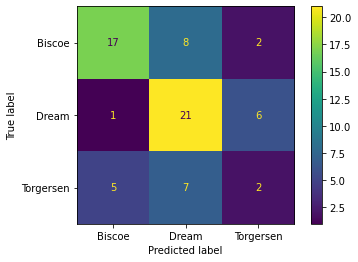

In [21]:
metrics.plot_confusion_matrix(grid_model, X_test,y_test)

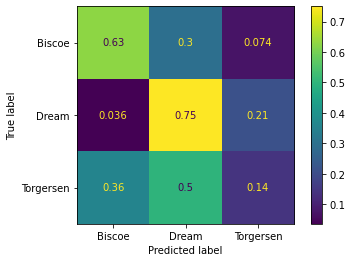

In [22]:
# Scaled so highest value=1
metrics.plot_confusion_matrix(grid_model, X_test,y_test,normalize='true')

In [23]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Biscoe       0.74      0.63      0.68        27
       Dream       0.58      0.75      0.66        28
   Torgersen       0.20      0.14      0.17        14

    accuracy                           0.58        69
   macro avg       0.51      0.51      0.50        69
weighted avg       0.57      0.58      0.57        69



In [36]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = metrics.roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
#         ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
        ax.plot(fpr[i], tpr[i], label= f'ROC curve (area = {roc_auc[i]}) for label {i}')
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

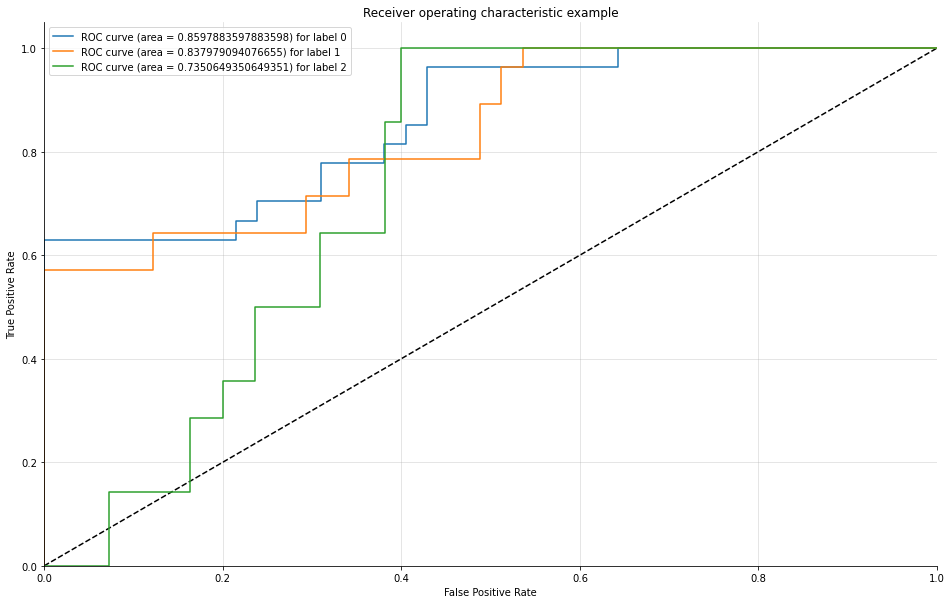

In [37]:
plot_multiclass_roc(grid_model, X_test, y_test, n_classes=3, figsize=(16, 10))